In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import PIL

from MNIST_dataset import get_training_dataset

In [60]:
training_dataset, len_dataset = get_training_dataset()
for img, bbox_true, label in training_dataset:
    break

idx = np.random.randint(0,64)


In [78]:
cell_i, cell_j, _ = bbox_true[idx].nonzero()[::5].permute(1,0)
cell_i, cell_j

(tensor([3]), tensor([2]))

In [80]:
xrcell = bbox_true[idx][cell_i,cell_j,0]
yrcell = bbox_true[idx][cell_i,cell_j,1]
rw = bbox_true[idx][cell_i,cell_j,2]
rh = bbox_true[idx][cell_i,cell_j,3]

In [65]:
xrcell *(1/6) -rw/2

tensor([-0.1600])

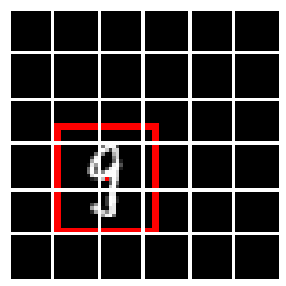

In [64]:
S=6

fig = plt.figure(figsize=(1, 1))

img_t = img[idx].to(torch.device('cpu')).squeeze(0)
img_arr = img_t.numpy() * 255.0
img1 = PIL.Image.fromarray(img_arr)
rgbimg = PIL.Image.new("RGBA", img1.size)
rgbimg.paste(img1)

# xmin = xrcell * cell_j * (1/6) * 75
rxc = xrcell*(1/S) + cell_j * (1/S)
xmin = (rxc - rw/2)*75

# ymin = xrcell * cell_i * (1/6) * 75
ryc = (yrcell*(1/S) + cell_i * (1/S))
ymin = (ryc - rh/2)*75

xmax = xmin + rw * 75 
ymax = ymin + rh * 75


cx_abs = (xmin+xmax)/2
cy_abs = (ymin+ymax)/2

left, right, top, bottom = xmin, xmax, ymin, ymax

draw = PIL.ImageDraw.Draw(rgbimg)
draw.line([(left, top), (left, bottom), (right, bottom), (right, top), (left, top)], width=2, fill='red')
draw.point((cx_abs,cy_abs), fill="red")

gleft = 0
gright = 0
for it in range(6):
    g1 = 12.5*it
    g2 = 12.5*it
    
    grid_x = [(0,g1), (75,g2)]
    grid_y = [(g1,0), (g2,75)]
    draw.line(grid_x)
    draw.line(grid_y)

fig.set_size_inches(5, 5)
plt.imshow(rgbimg)
plt.axis('off');